# 연구과제 3. 흡연여부 판별 분류

## #1. 패키지 참조

In [89]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

## #2. 데이터 불러오기 및 특성 확인

In [90]:
origin = my_read_excel('C:/Users/J/Desktop/Data_Science/Class/E.추론통계/E.InferentialStatistics/수업자료/smoker_status.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

> - 총 159,256행 23열
> - 종속변수: smoking(흡연여부), 독립변수: 나머지 22개
> - 데이터타입 모두 숫자형(int, float)
> - 치아우식증유무(dental caries)와 흡연유무(smoking)은 카테고리 타입으로 변환
> - 결측치가 없다
> - 중간값과 평균 비교한 결과 Gtp가 조금 차이가 나고 나머지 변수는 거의 동일한 것으로 보아 이상치가 많이 있어보이지는 않는다. 

## #3. 전처리 

### (1) 데이터타입 변환

In [91]:
origin['dental caries'] = origin['dental caries'].astype('category')
origin['smoking'] = origin['smoking'].astype('category')
origin.dtypes

age                       int64
height(cm)                int64
weight(kg)                int64
waist(cm)               float64
eyesight(left)          float64
eyesight(right)         float64
hearing(left)             int64
hearing(right)            int64
systolic                  int64
relaxation                int64
fasting blood sugar       int64
Cholesterol               int64
triglyceride              int64
HDL                       int64
LDL                       int64
hemoglobin              float64
Urine protein             int64
serum creatinine        float64
AST                       int64
ALT                       int64
Gtp                       int64
dental caries          category
smoking                category
dtype: object

### (2) 이상치 확인 

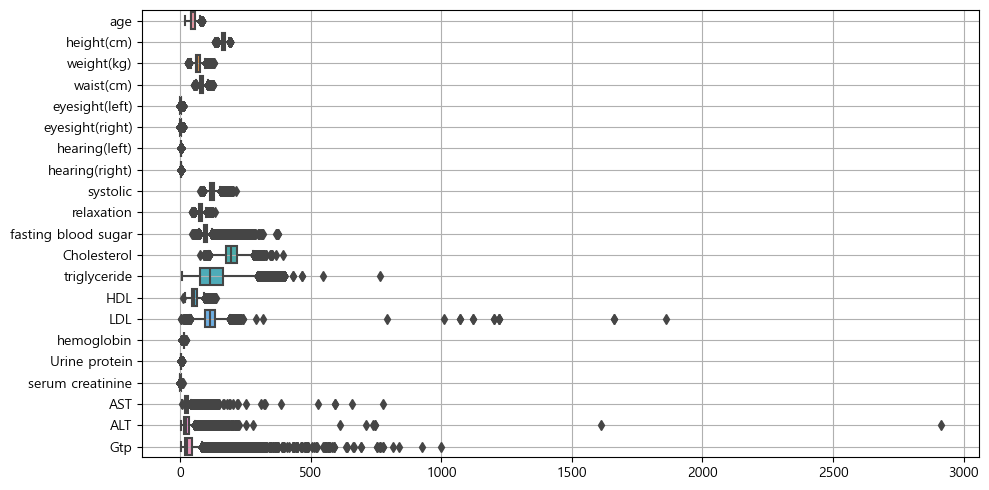

In [92]:
my_boxplot(origin, orient='h')

> - 각 변수별 이상치가 눈에 띄게 높은 것은 각 수치가 가질 수 있는 값의 범위를 파악한 뒤 제거 여부를 결정해야 할 것 같다.
> - 데이터의 범위가 달라 표준화가 필요해 보인다
> - triglyceride(중성지방), LDL(저밀도 지단백 수치), AST(아스파르트 아미노전이효소 수준), ALT(알라닌아미노 전이효소 수준), Gtp(감마-글루타밀 전이효소 수준)
> - 중성지방과 LDL 모두 정상치보다 매우 높게 나왔지만 나올 수 있는 수치이며 AST, ALT, Gtp는 급성 바이러스간염이나 알코올성간염일 경우 나올 수 있는 수치이기 때문에 이상치 제거는 하지 않기로 한다.


> <이상치 필드 정상 수치 비교>
>| 필드명 | 정상수치 | 최고수치 | 단위 |
>| --- | --- | --- | --- |
>| triglyceride | 150 이하 | 766 | mg/dL |
>| LDL | 90~130 | 1860 | mg/dL |
>| AST | 0~40 | 778 | U/L |
>| ALT | 0~40 | 2914 | U/L |
>| Gtp | 0~50 | 999 | IU/L | 

### (3) 중복행 체크

In [93]:
# 중복행 유무 체크
origin.duplicated().sum()

0

## #4. 탐색적 데이터 분석

### (1) 연속형 변수의 데이터 분포 확인

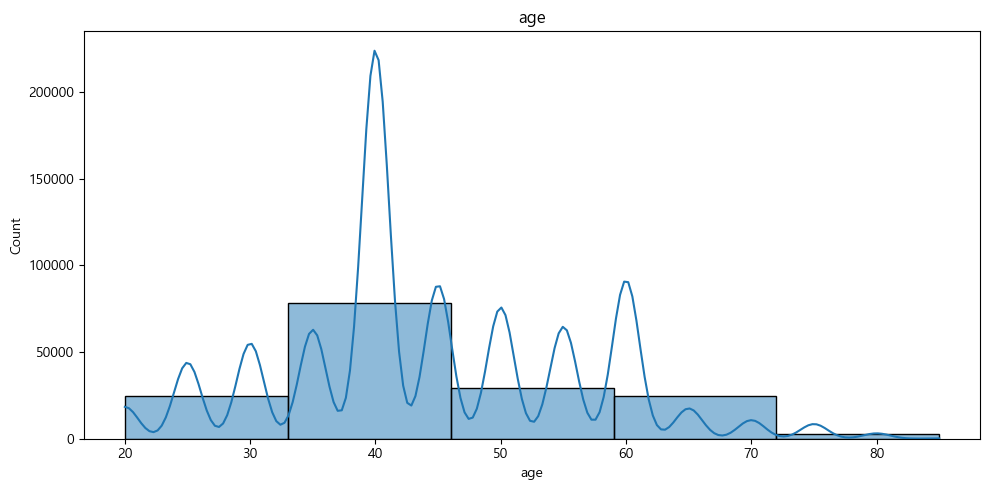

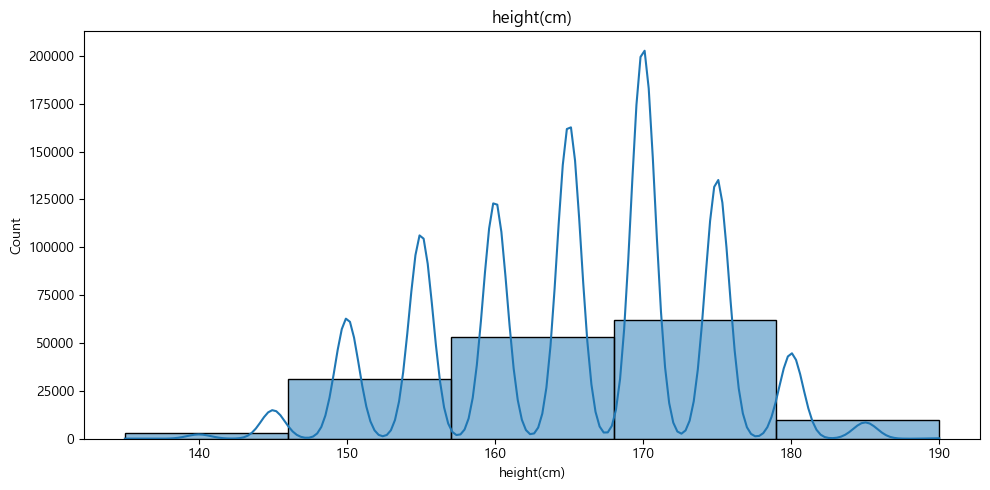

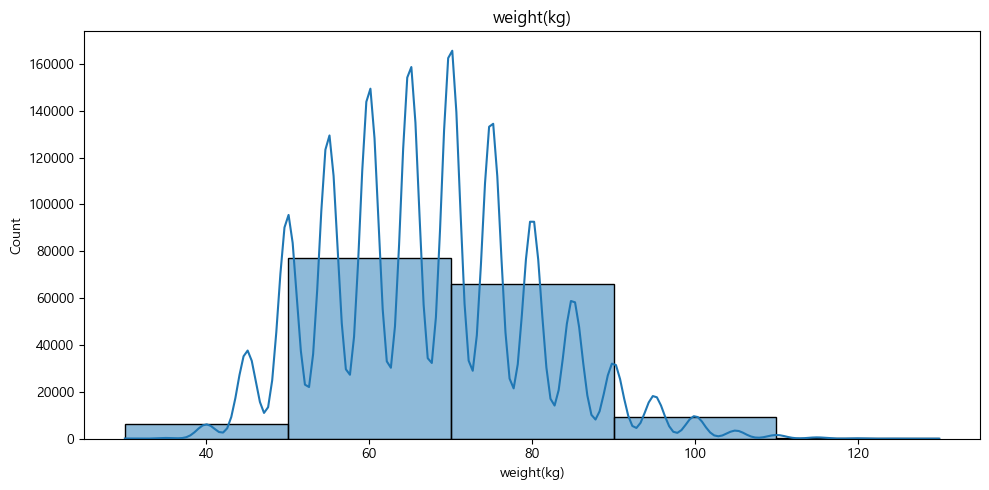

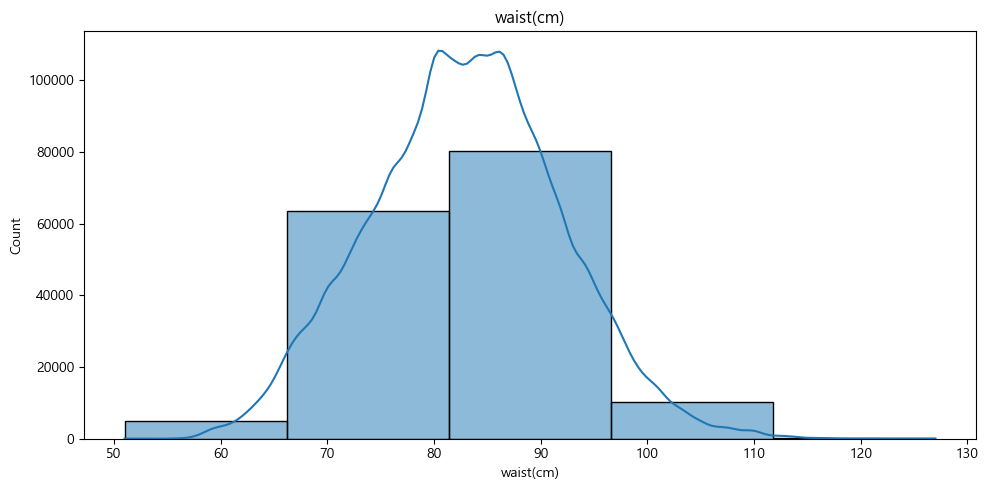

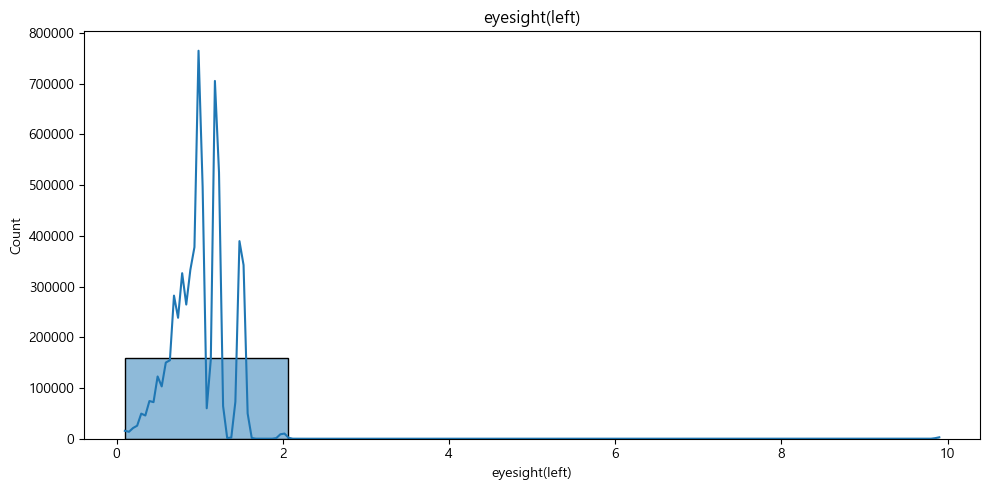

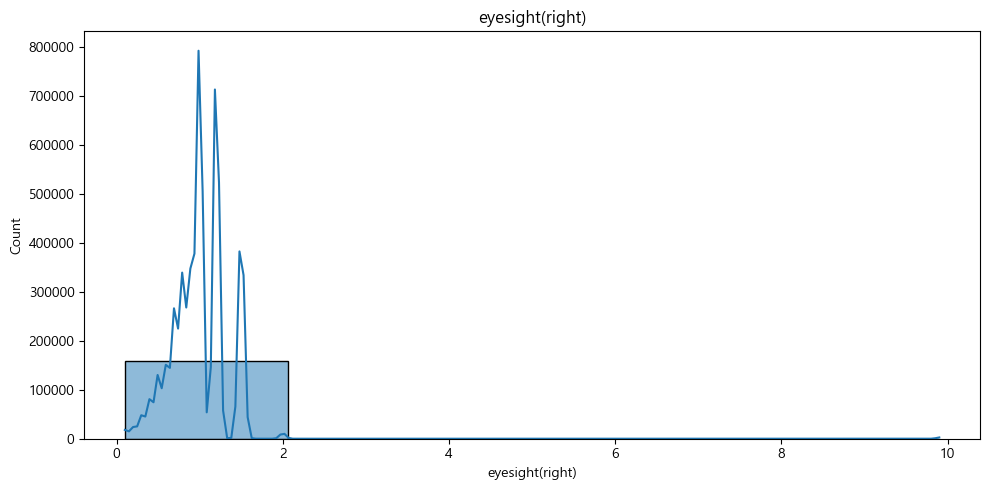

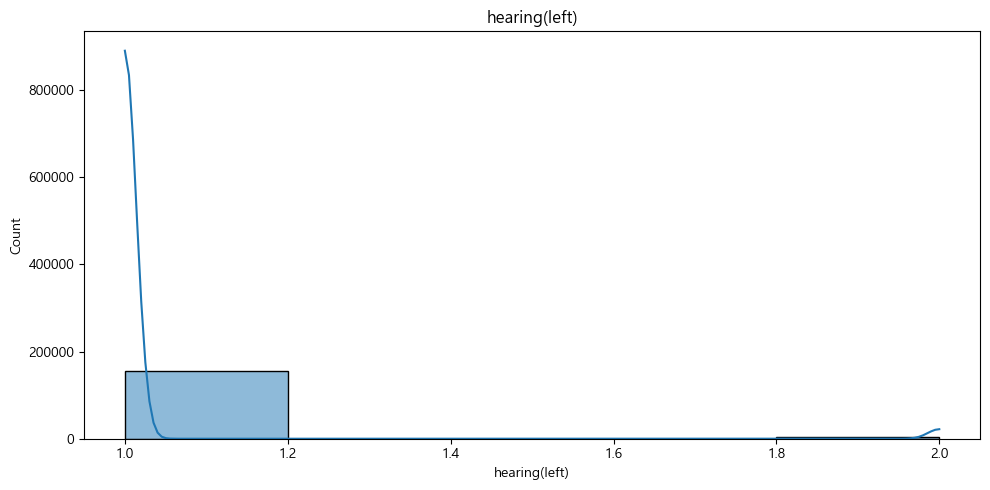

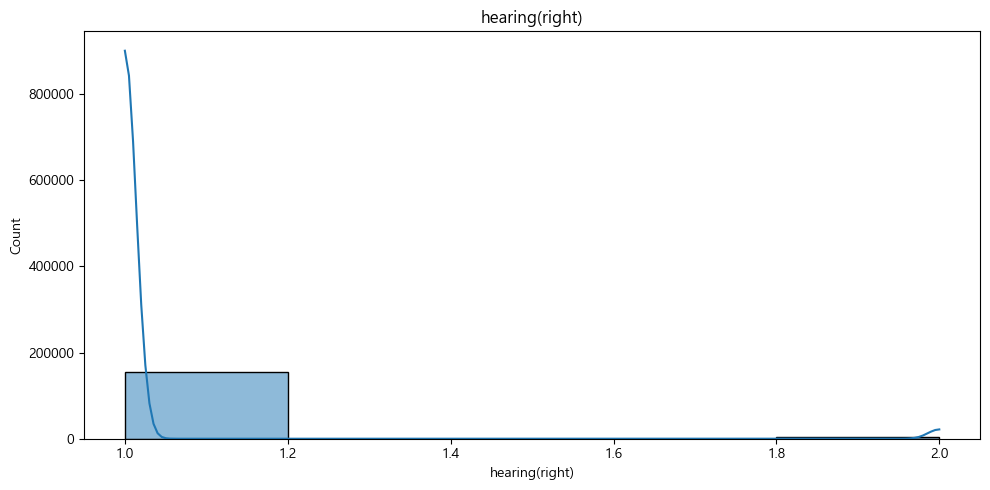

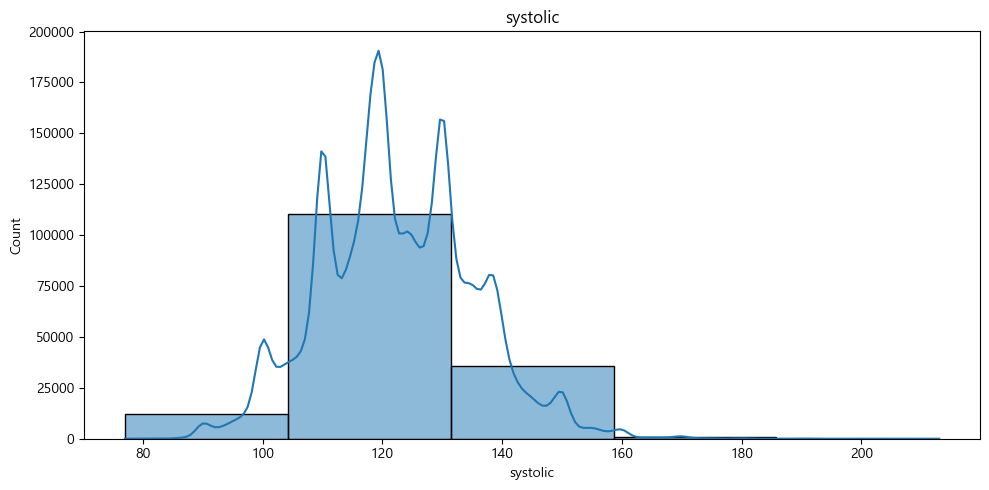

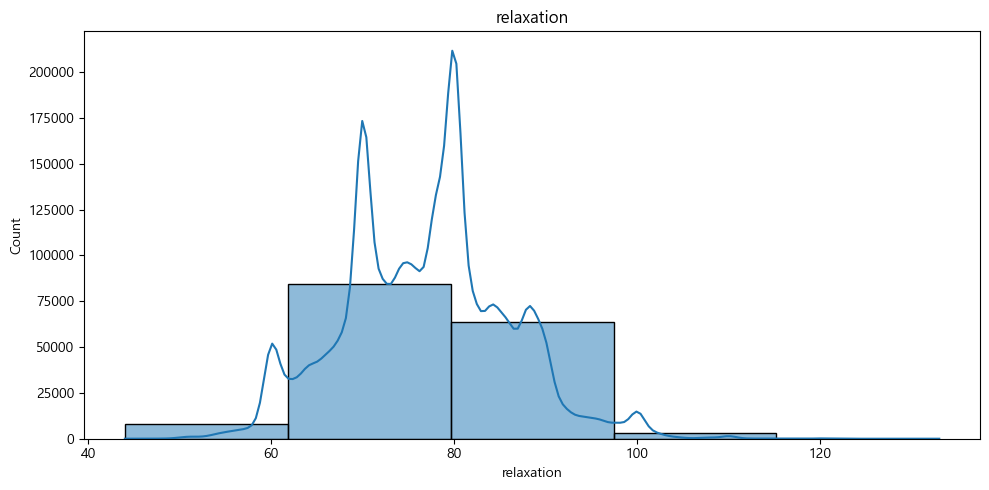

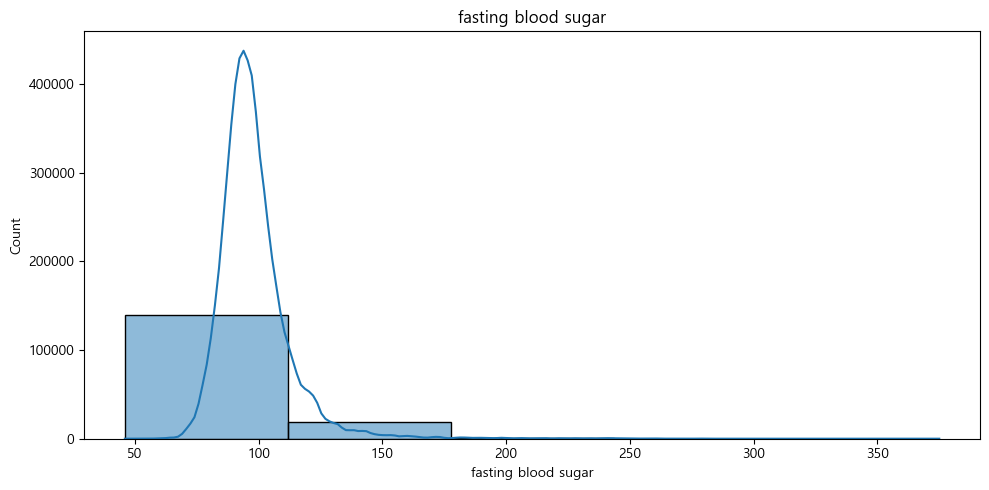

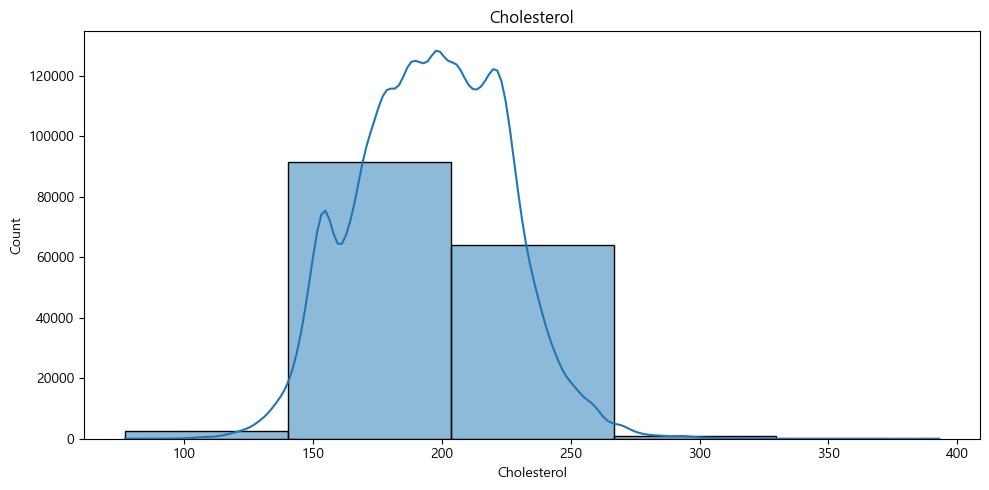

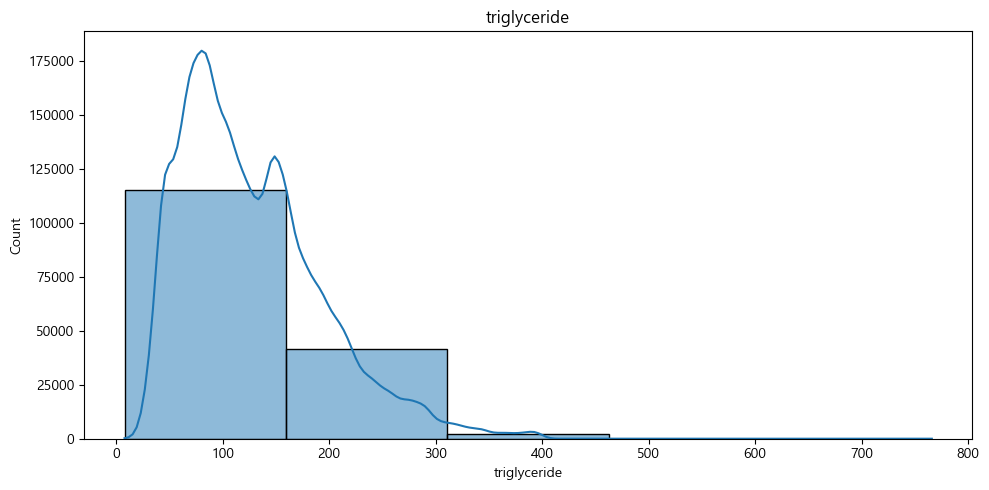

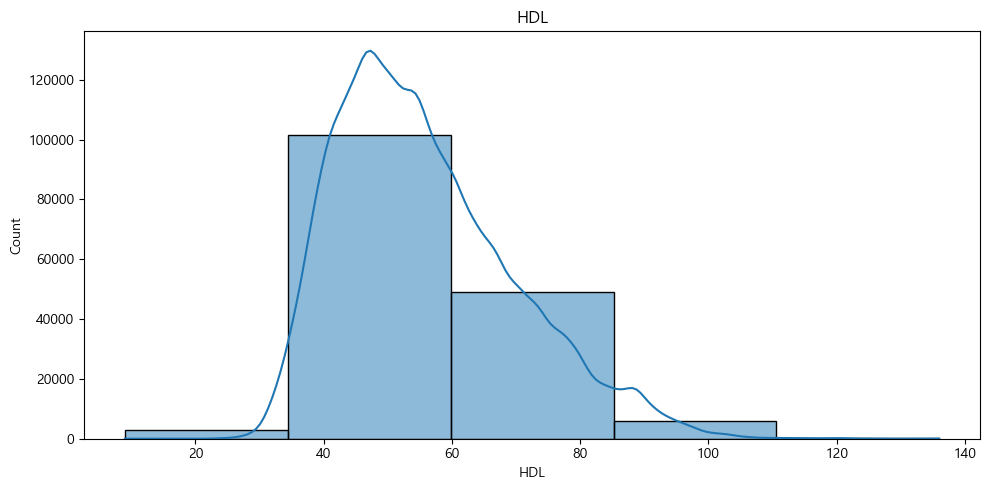

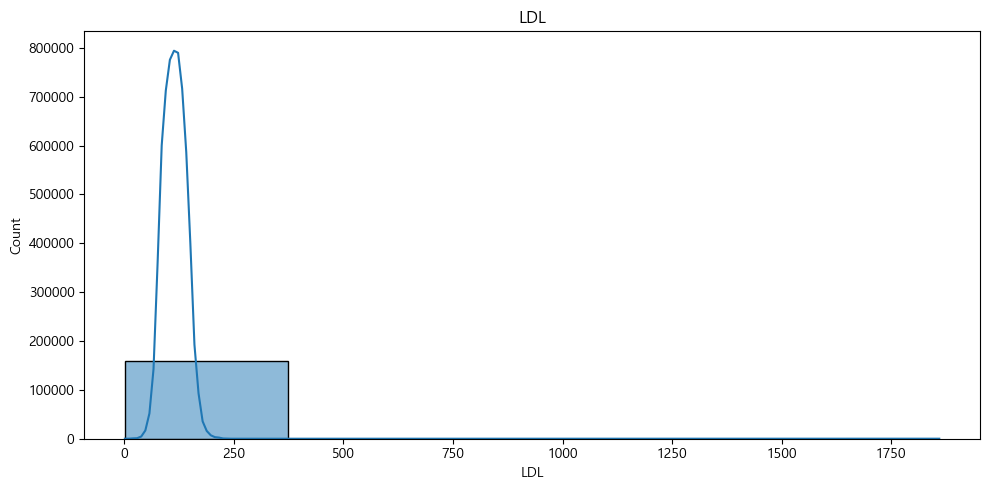

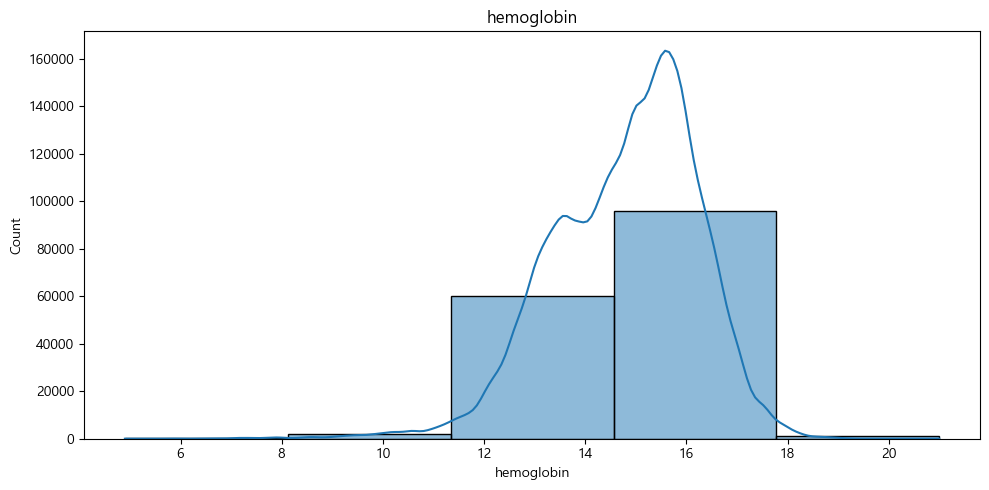

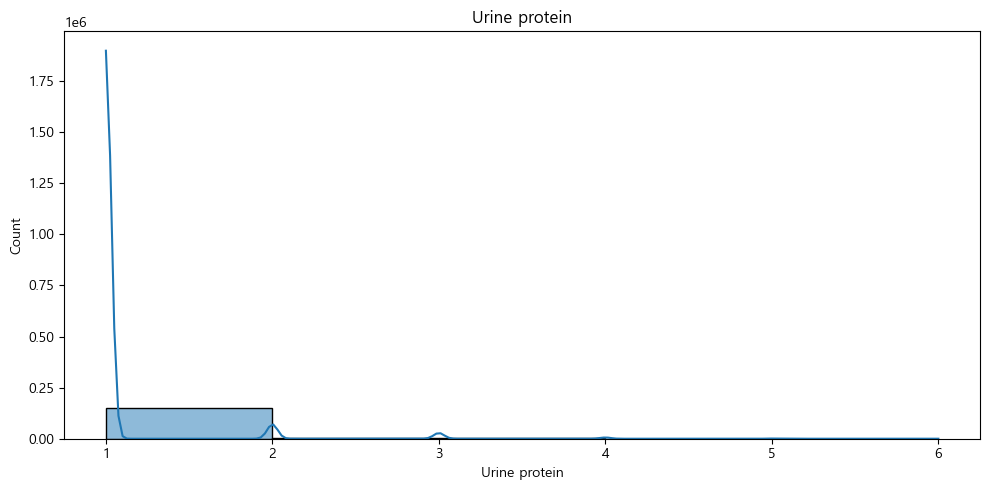

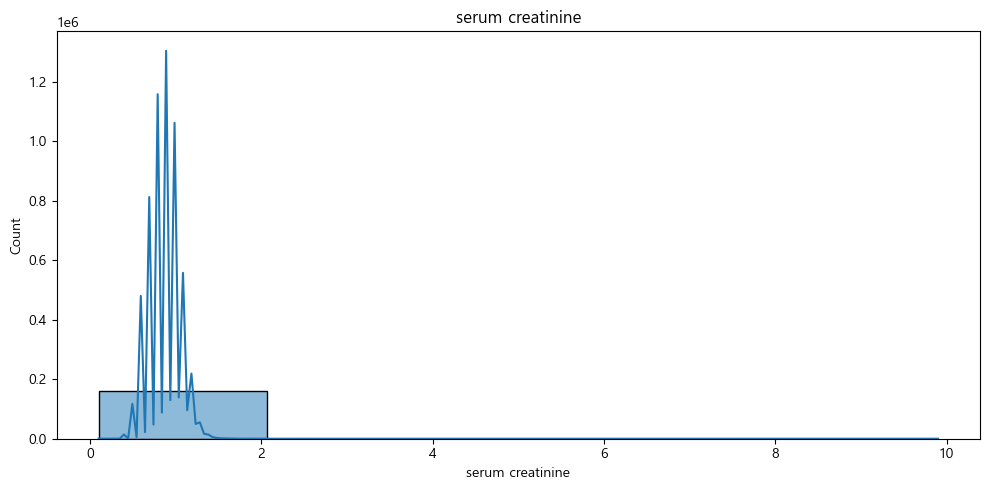

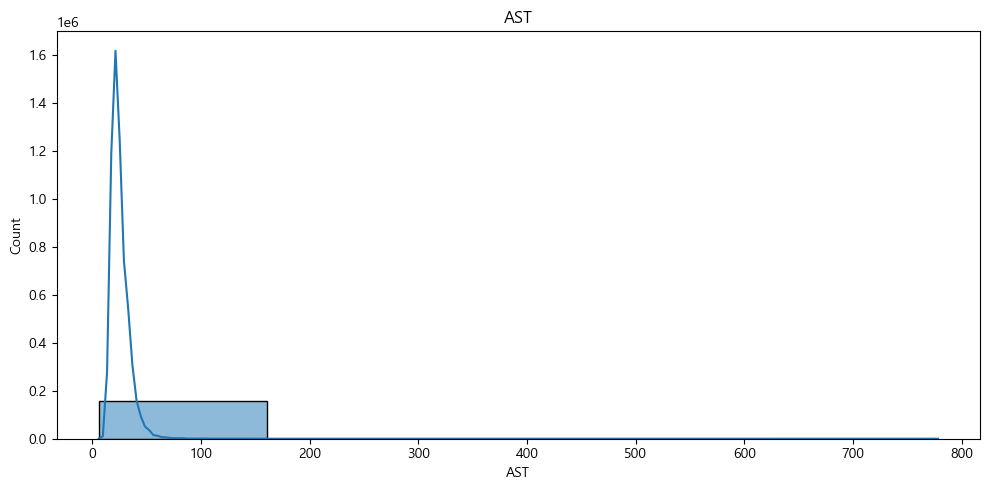

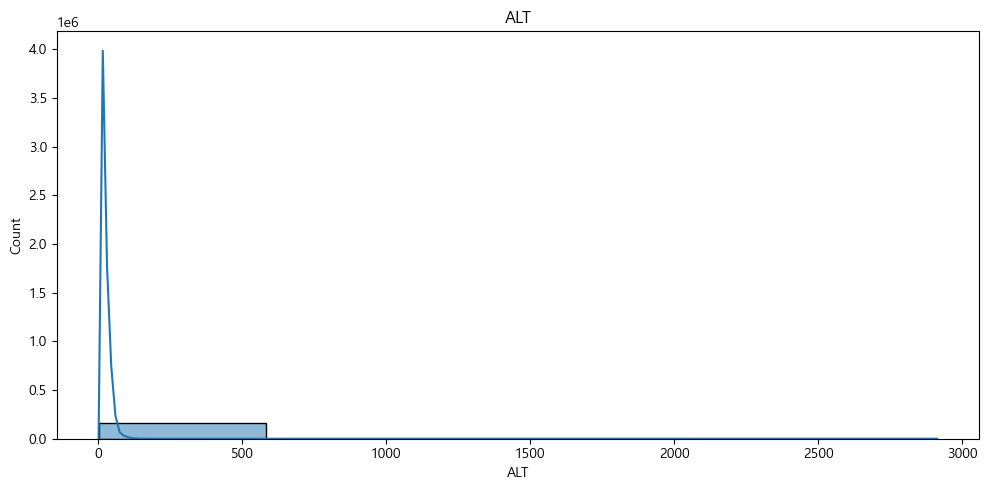

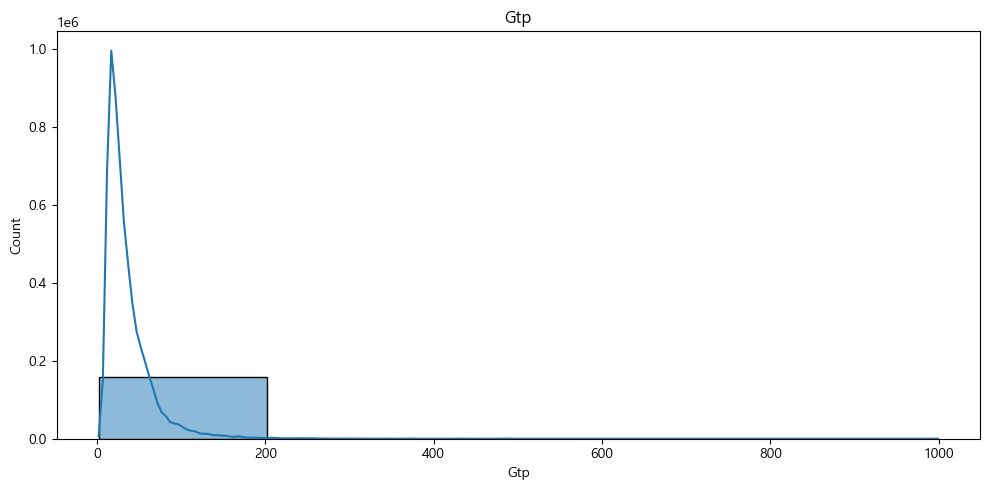

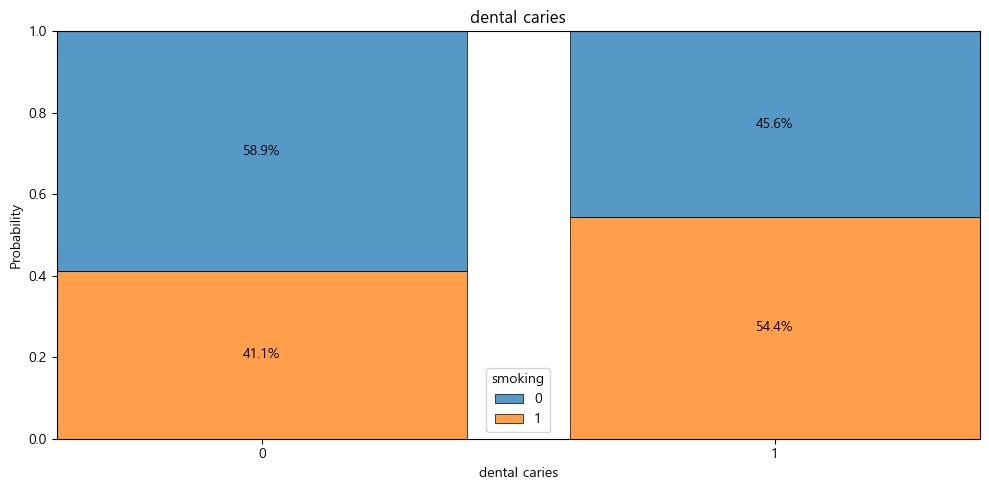

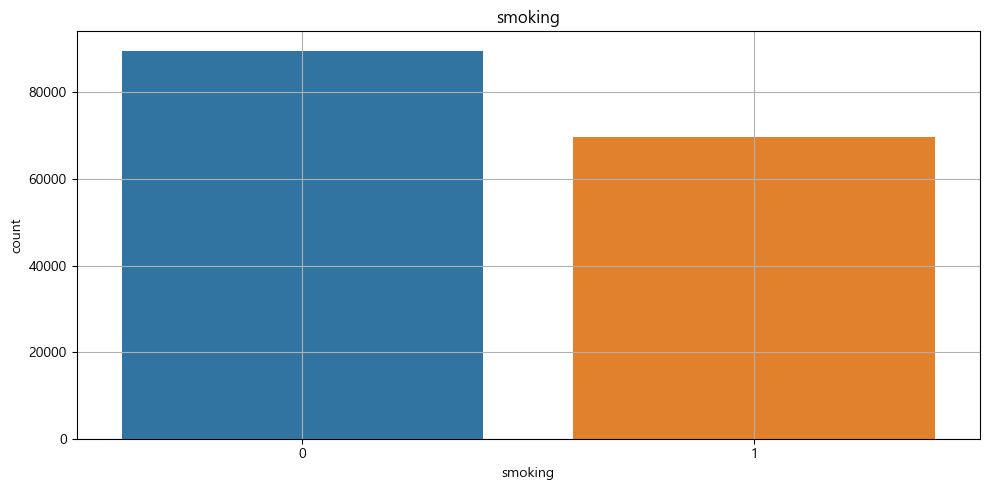

In [94]:
for i in origin.columns:
    if i == 'dental caries':
        my_stackplot(origin, xname=i, hue='smoking', dpi=100, callback = lambda ax: ax.set_title(i))
    elif i == 'smoking':
        my_countplot(origin, xname='smoking', dpi=100, callback = lambda ax: ax.set_title(i))
    else:
        my_histplot(origin, xname=i, dpi=100, bins = 5, callback = lambda ax: ax.set_title(i))

> - 데이터 분포와 특성에 따라 라벨링, 파생변수 등 전처리가 필요해 보인다.
> - 몸무게와 허리둘레, 수축기혈압과 휴식혈압, 공복혈당수치와 콜레스트롤 등 서로 상관 있어보이는 변수들이 보인다.
> - 정상수치와 비정상수치로 나누어서 파생변수를 만들어 볼 수 있을 것 같다.
> - 먼저 아무 전처리를 하지 않고 해본다.
> ------------
> [전처리 방향]
> - 라벨링: 나이, 키, 몸무게
> - 파생변수: 시력 좌우평균, 청력 좌우평균  



### (2) 종속변수에 따른 연속형 변수의 데이터 분포 확인

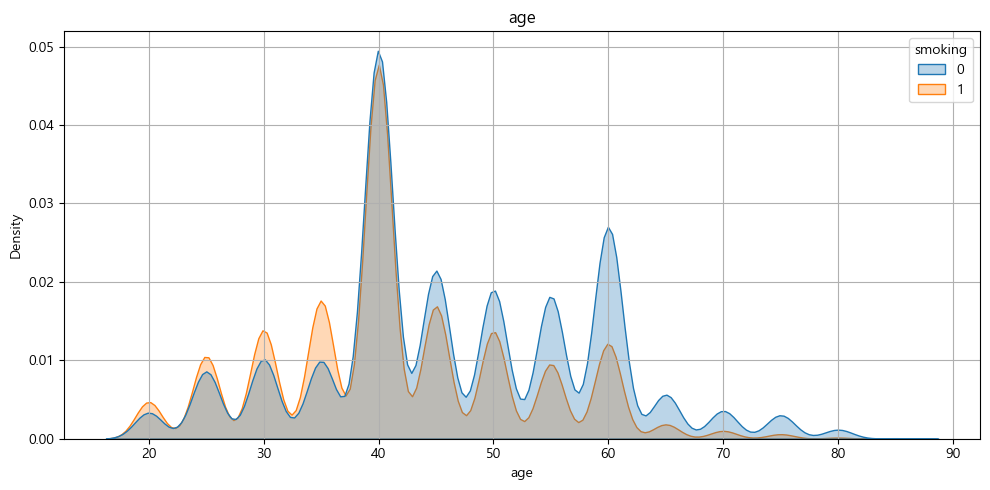

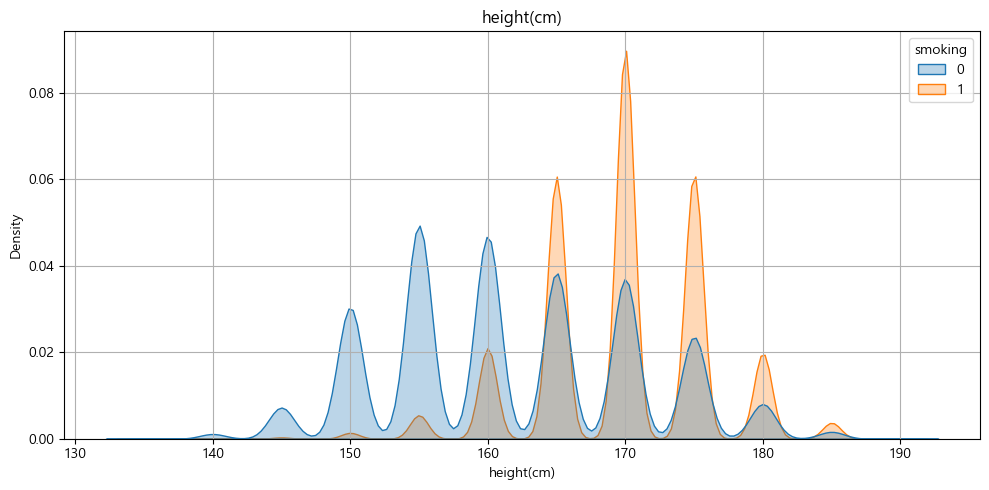

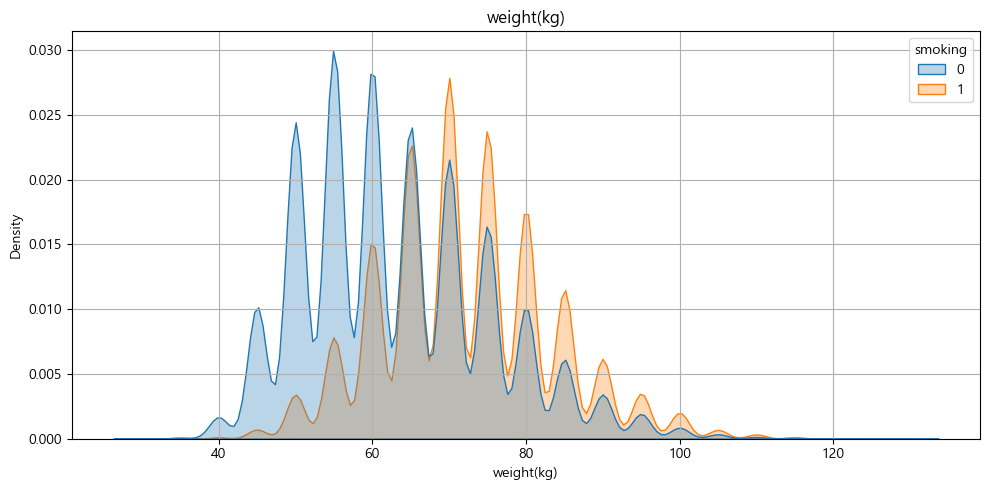

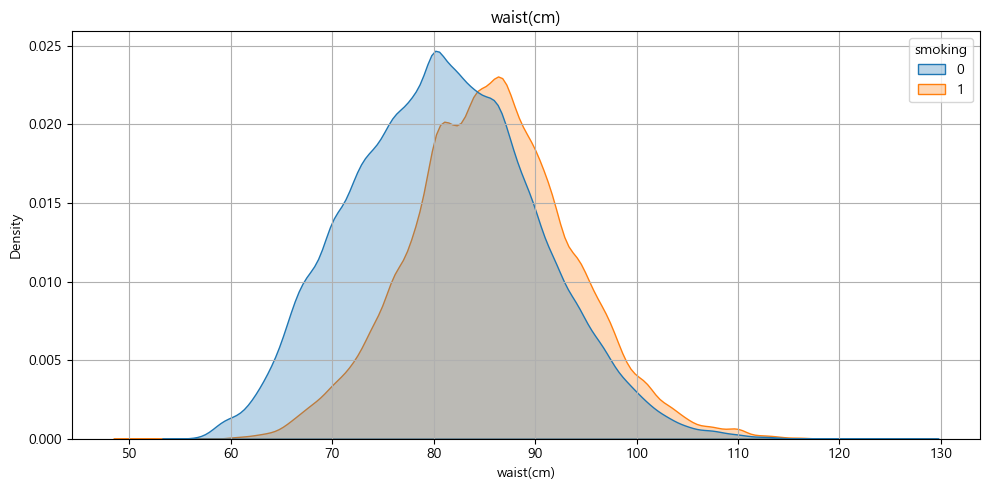

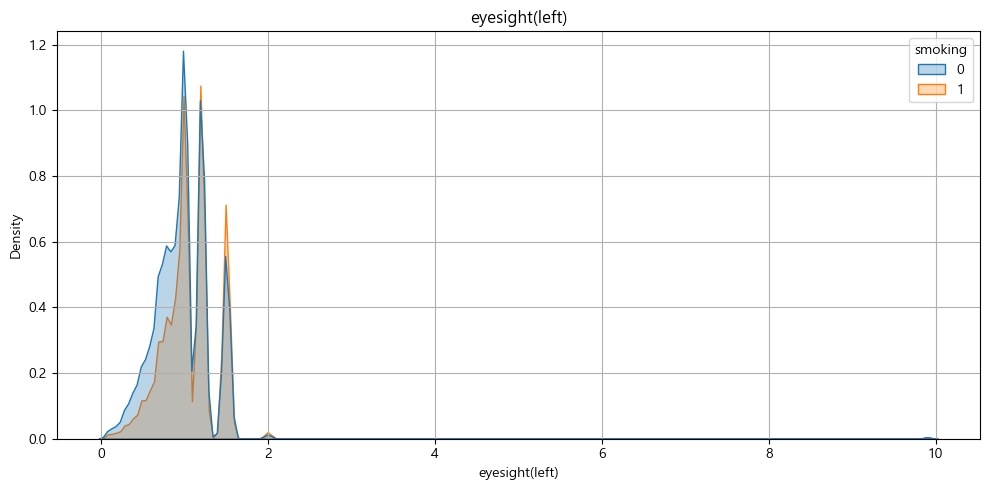

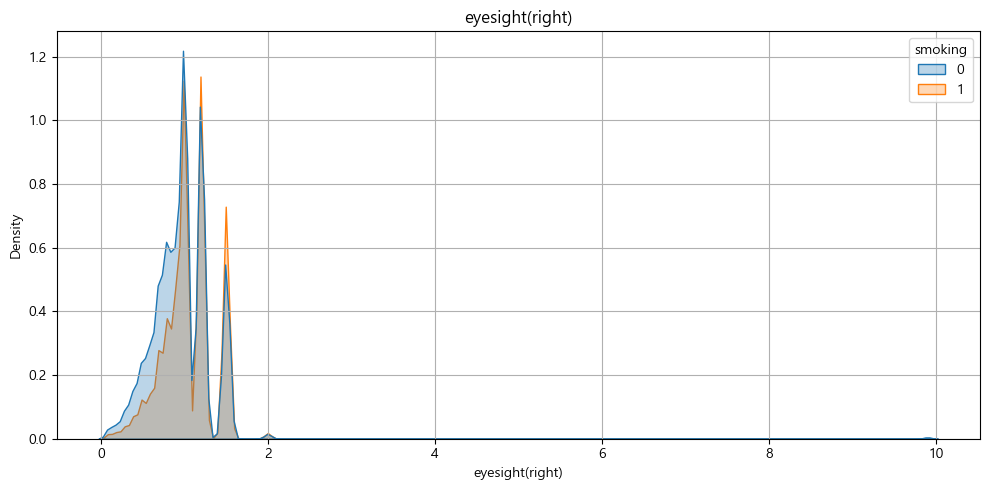

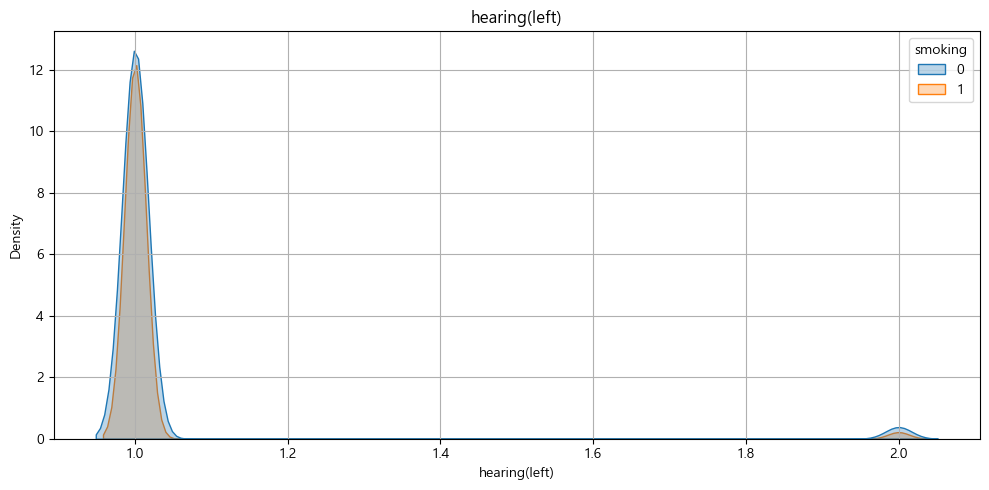

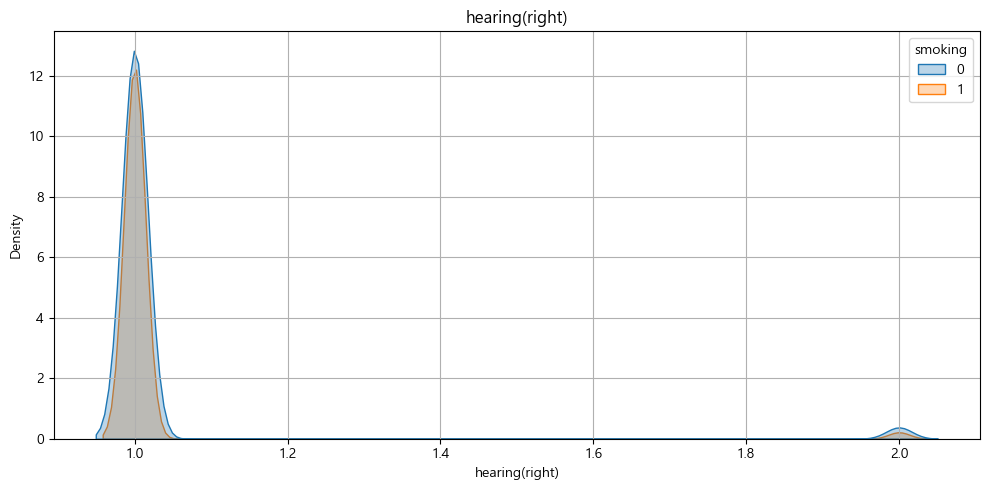

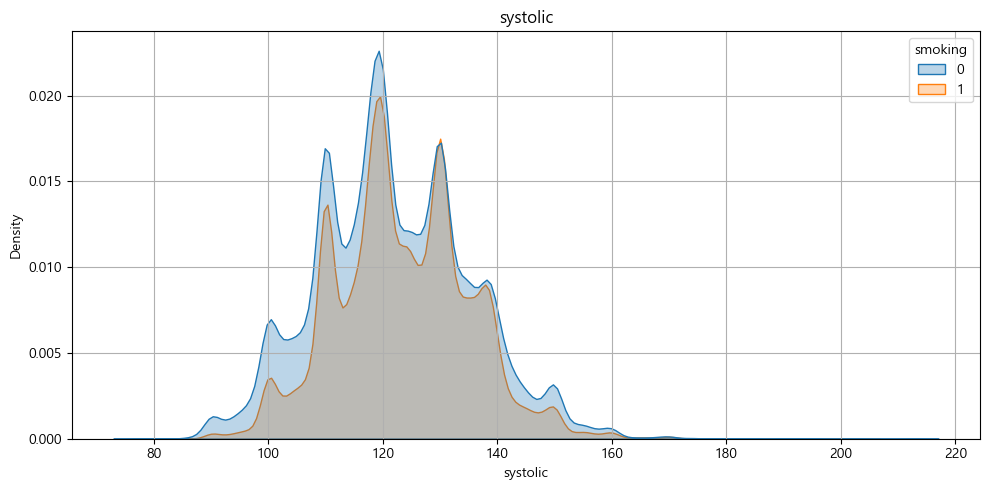

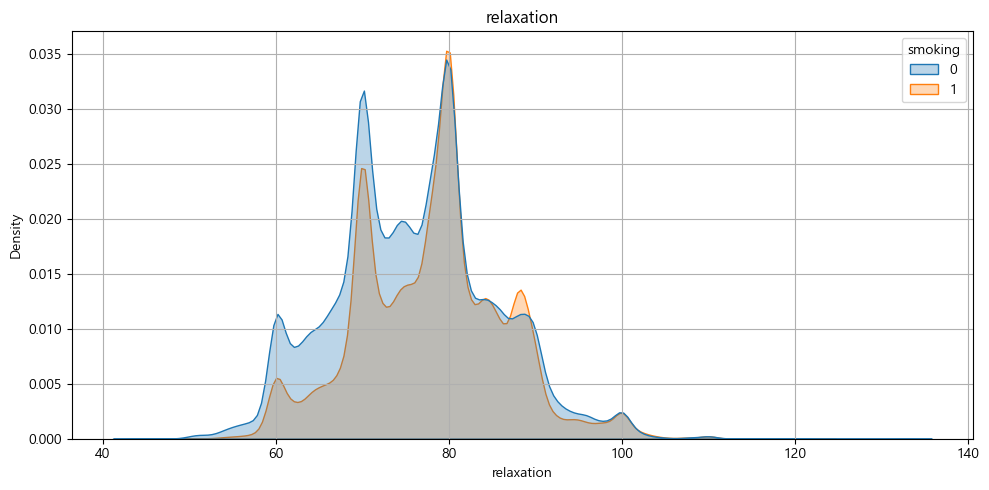

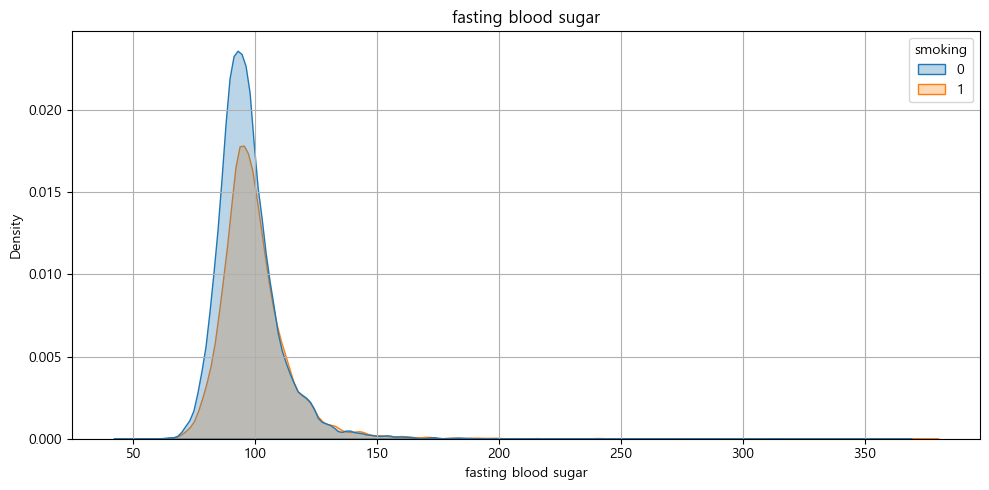

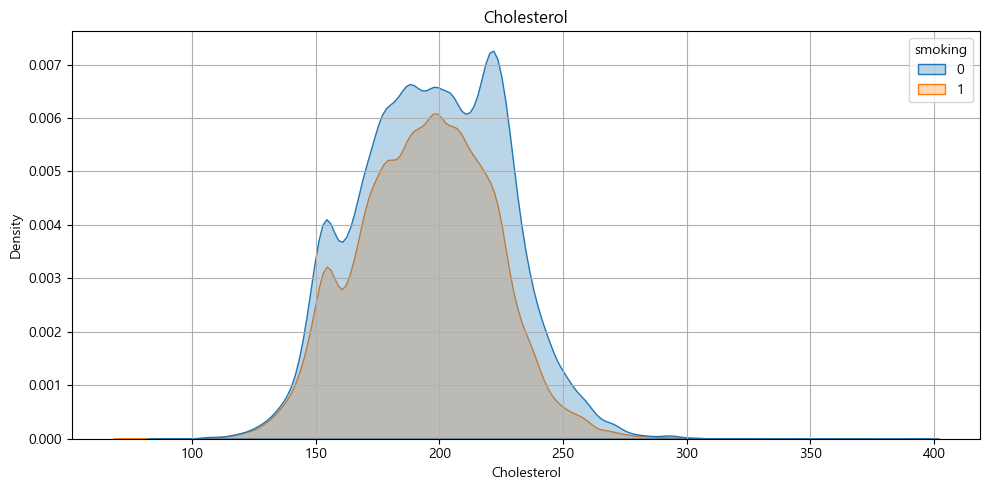

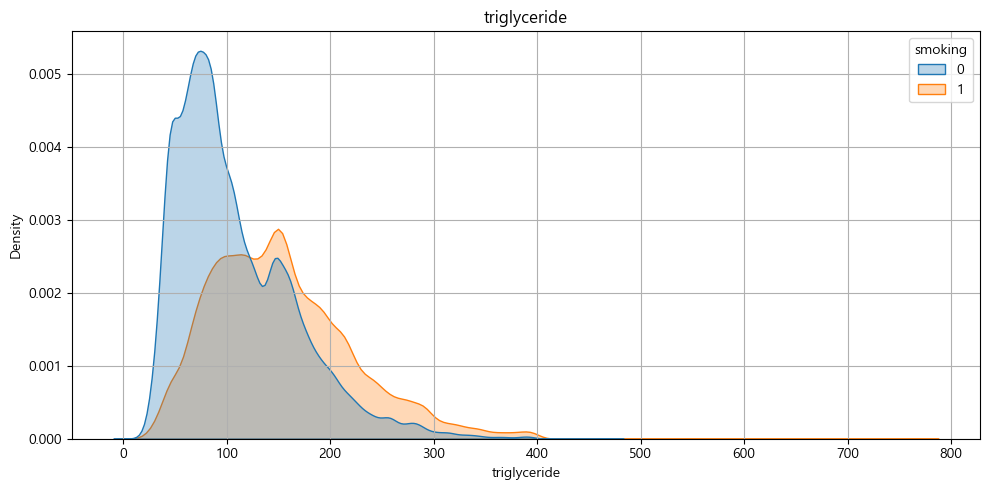

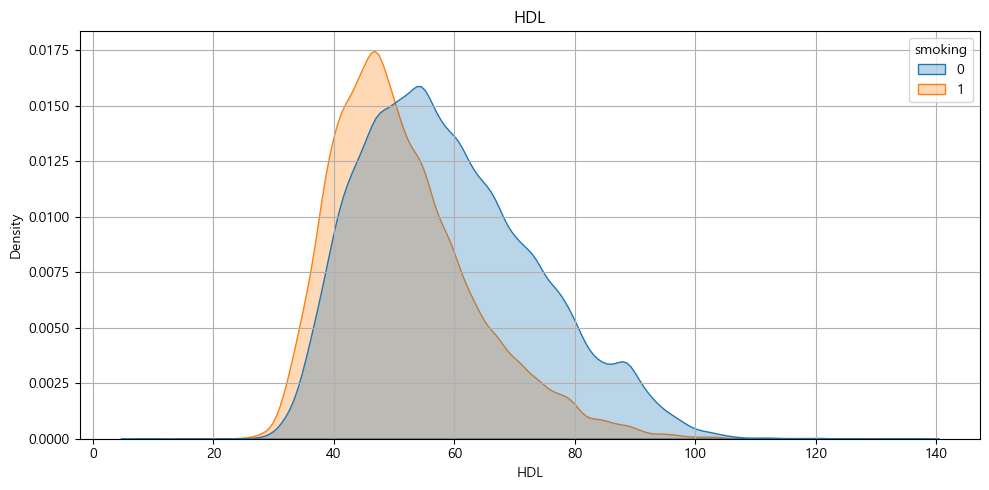

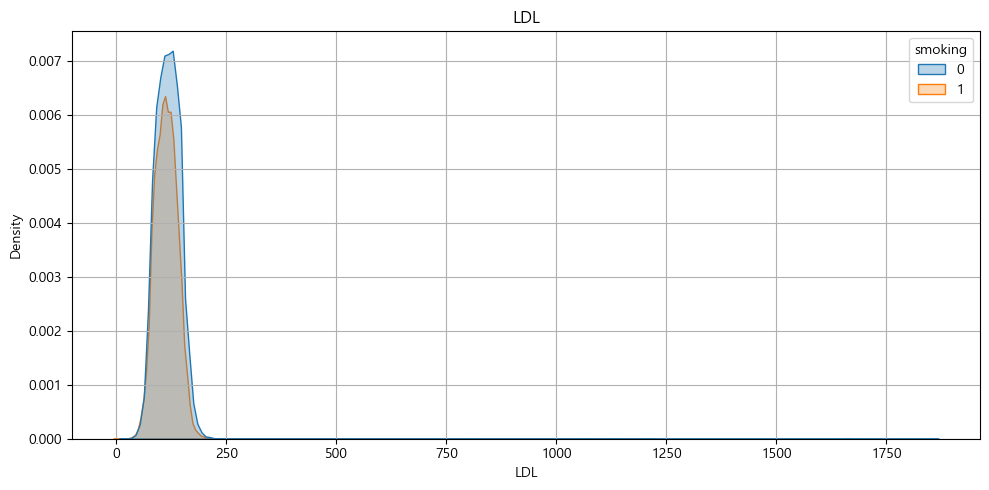

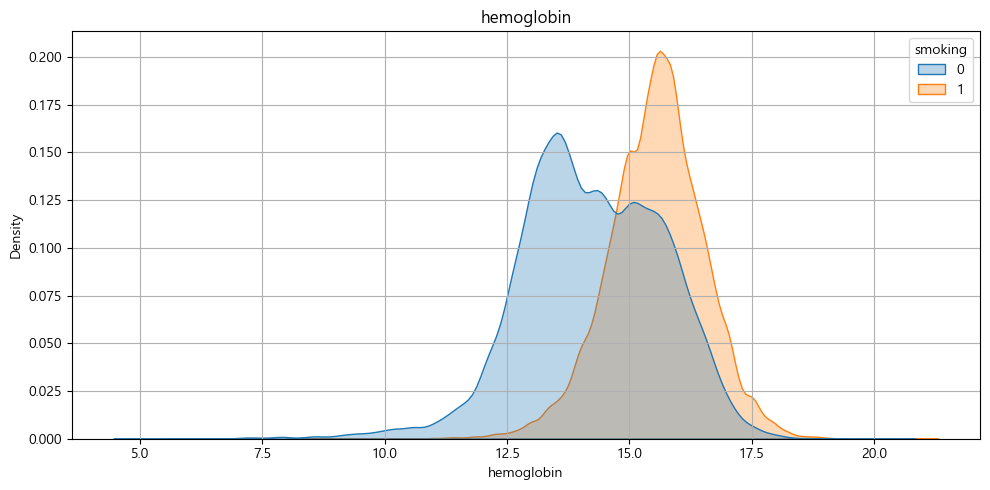

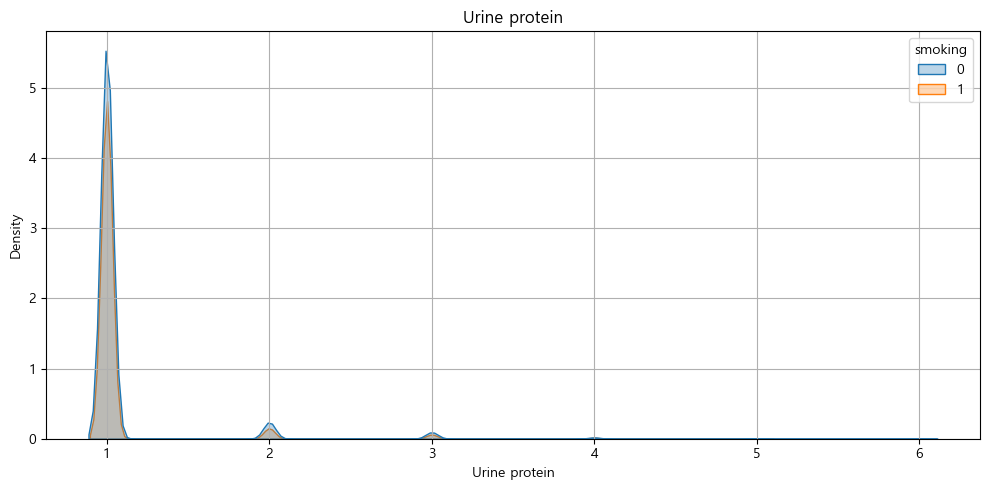

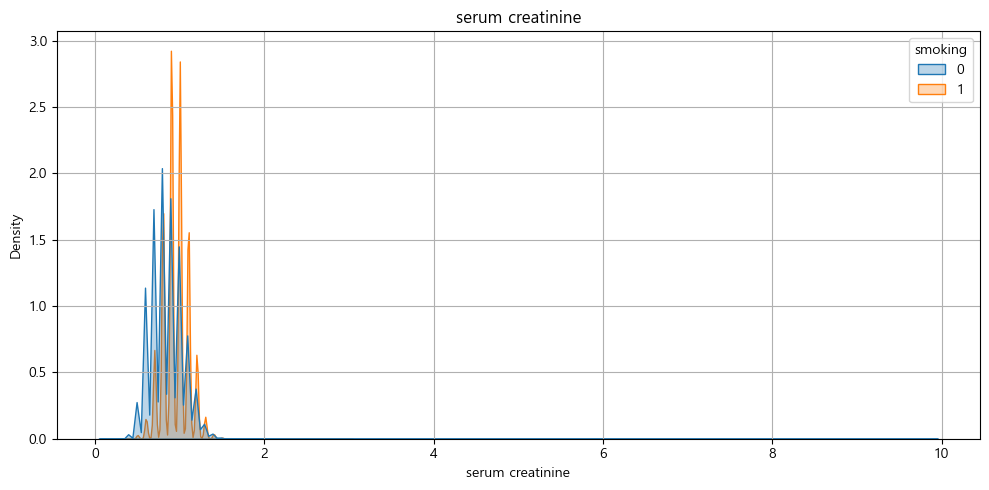

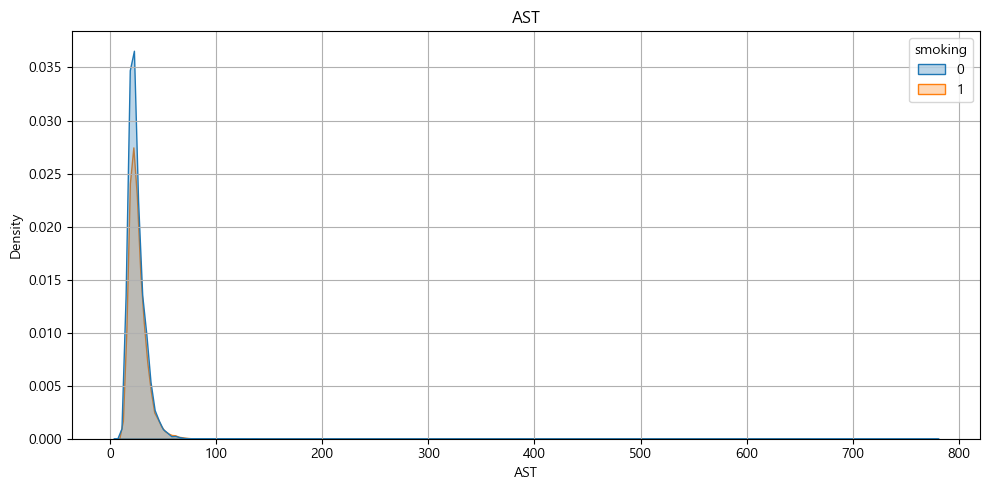

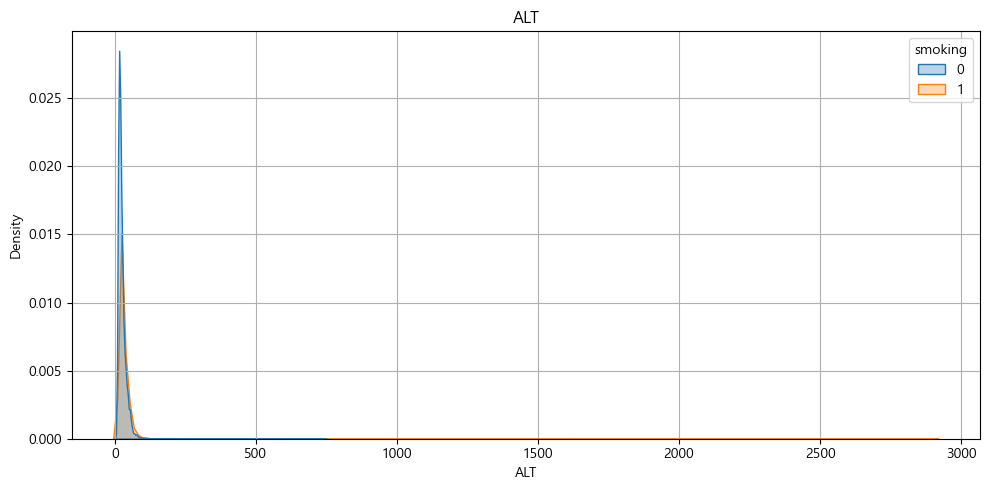

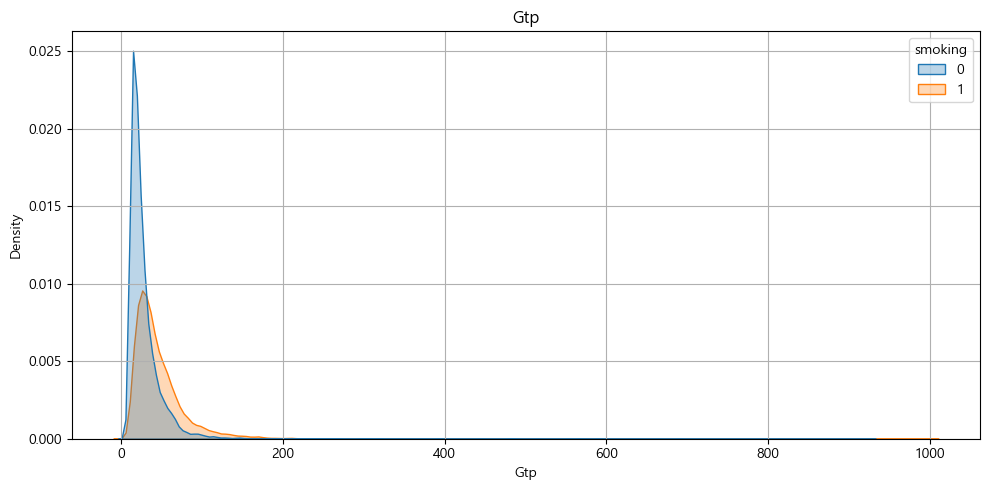

In [95]:
for i in origin.columns:
    if i in ['dental caries','smoking']:
        continue    
    else:
        my_kdeplot(origin, xname=i, dpi=100, hue='smoking',fill=True, callback = lambda ax: ax.set_title(i))

> - 나이, 키, 몸무게, 중성지방, 헤모글로빈, 혈청 크레아티닌, ALT, Gtp에서 흡연자와 비흡연자간의 유의미한 차이가 보인다.
> - 키에서 차이가 나는 것은 성별의 차이에 기인한 것으로 보인다.
> - 먼저 전처리 하지 않고 모델 생성

### (3) 상관분석

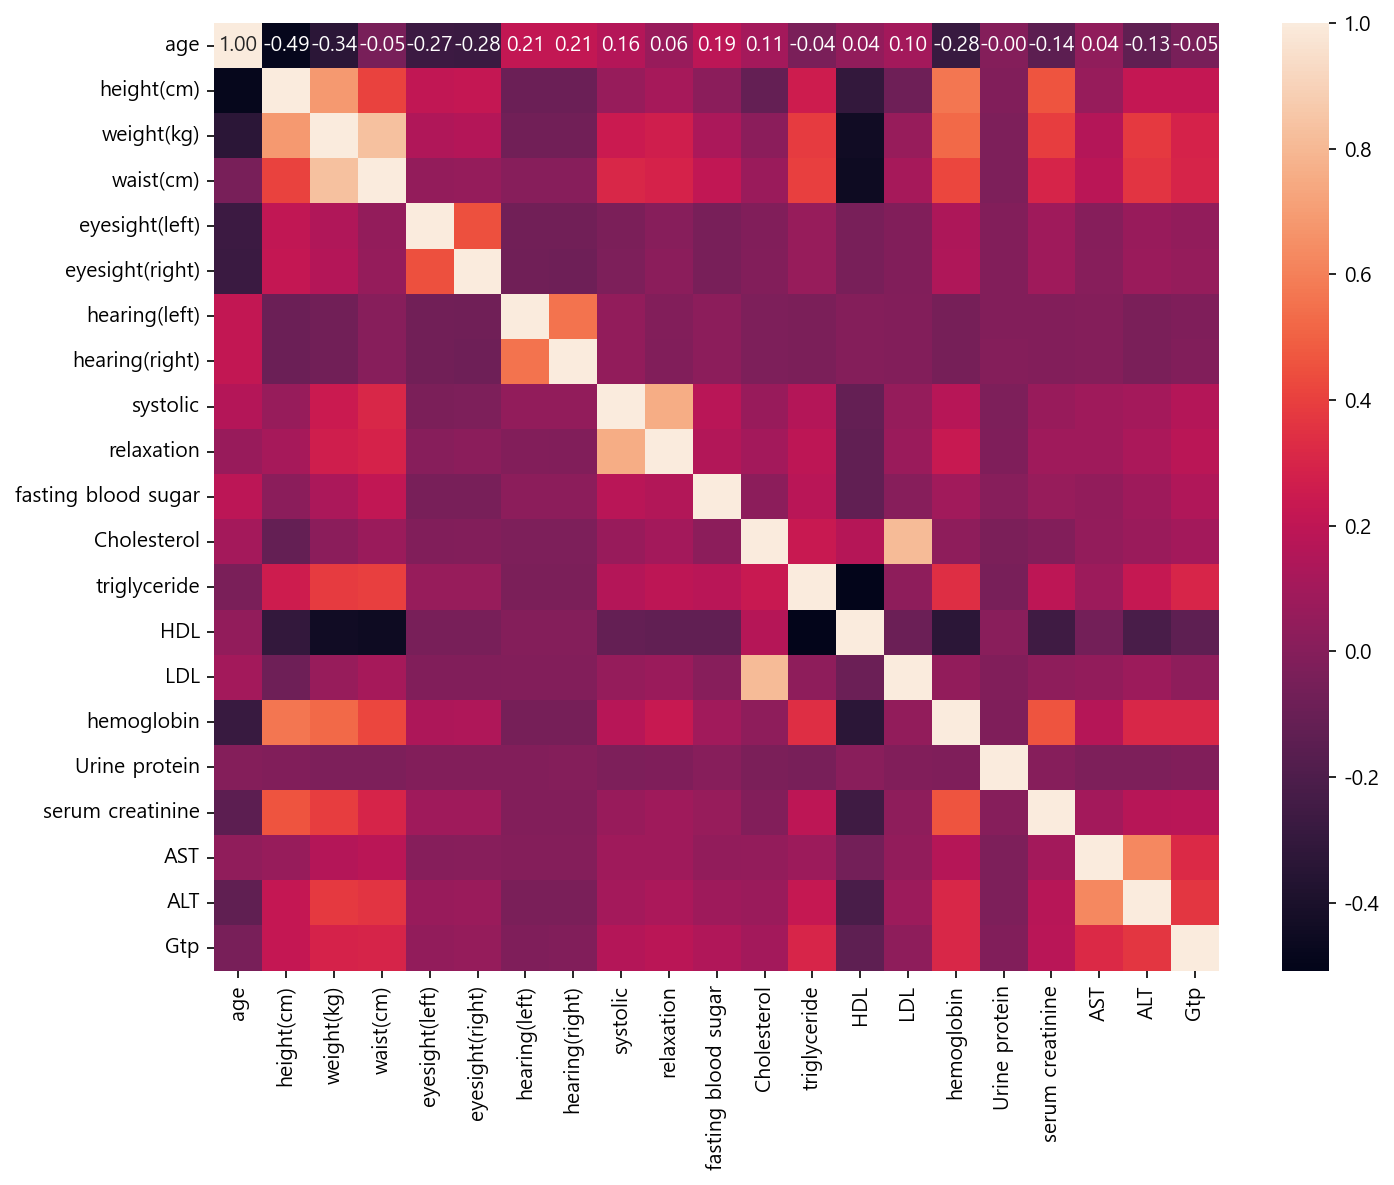

+---------------------------------------------+---------------+--------------+----------+
|                                             |   correlation |      p-value | result   |
|---------------------------------------------+---------------+--------------+----------|
| ('age', 'height(cm)')                       |     -0.489608 |            0 | True     |
| ('age', 'weight(kg)')                       |     -0.336859 |            0 | True     |
| ('age', 'waist(cm)')                        |    -0.0453689 |  2.44943e-73 | True     |
| ('age', 'eyesight(left)')                   |     -0.269495 |            0 | True     |
| ('age', 'eyesight(right)')                  |     -0.277638 |            0 | True     |
| ('age', 'hearing(left)')                    |      0.212889 |            0 | True     |
| ('age', 'hearing(right)')                   |      0.212972 |            0 | True     |
| ('age', 'systolic')                         |      0.160437 |            0 | True     |
| ('age', 

In [96]:
my_correlation(origin)

## #5. 데이터 전처리

In [97]:
# 데이터 타입 확인
origin.dtypes    # dental은 더미변수화, smoking은 int로 변경

age                       int64
height(cm)                int64
weight(kg)                int64
waist(cm)               float64
eyesight(left)          float64
eyesight(right)         float64
hearing(left)             int64
hearing(right)            int64
systolic                  int64
relaxation                int64
fasting blood sugar       int64
Cholesterol               int64
triglyceride              int64
HDL                       int64
LDL                       int64
hemoglobin              float64
Urine protein             int64
serum creatinine        float64
AST                       int64
ALT                       int64
Gtp                       int64
dental caries          category
smoking                category
dtype: object

In [98]:
origin['smoking'] = origin['smoking'].astype('int')
origin.dtypes

age                       int64
height(cm)                int64
weight(kg)                int64
waist(cm)               float64
eyesight(left)          float64
eyesight(right)         float64
hearing(left)             int64
hearing(right)            int64
systolic                  int64
relaxation                int64
fasting blood sugar       int64
Cholesterol               int64
triglyceride              int64
HDL                       int64
LDL                       int64
hemoglobin              float64
Urine protein             int64
serum creatinine        float64
AST                       int64
ALT                       int64
Gtp                       int64
dental caries          category
smoking                   int32
dtype: object

In [99]:
# 더미변수 생성
df = my_dummies(origin)
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,smoking,dental caries_1
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,1,0
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,0,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,1,0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,0,1
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,1,0


## #6. 데이터 분할

In [100]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='smoking', random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127404, 22), (31852, 22), (127404,), (31852,))

## #7. 로지스틱 회귀분석

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |          0.740346 |
| 16 |   100 | l2        |          0.739851 |
|  1 | 0.001 | l2        |          0.739208 |
| 13 |    10 | l2        |          0.739106 |
|  7 |   0.1 | l2        |          0.739098 |
|  4 |  0.01 | l2        |          0.739058 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.245012 |     0.246463 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.738917 |     0.737756 | 예측 결과(TN,FP,TP,TN)가 실제 결과

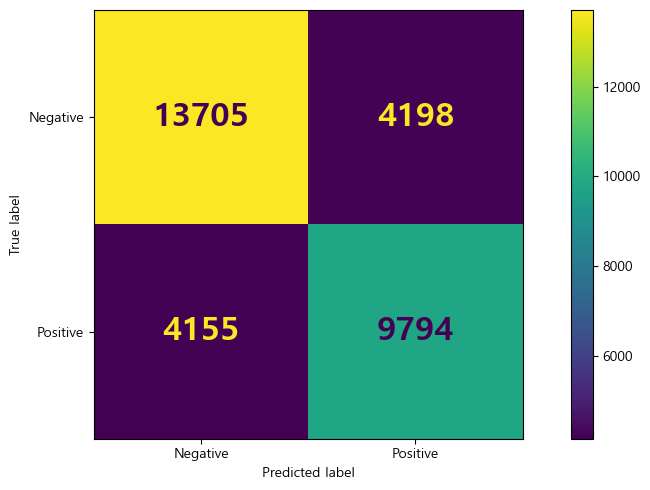


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


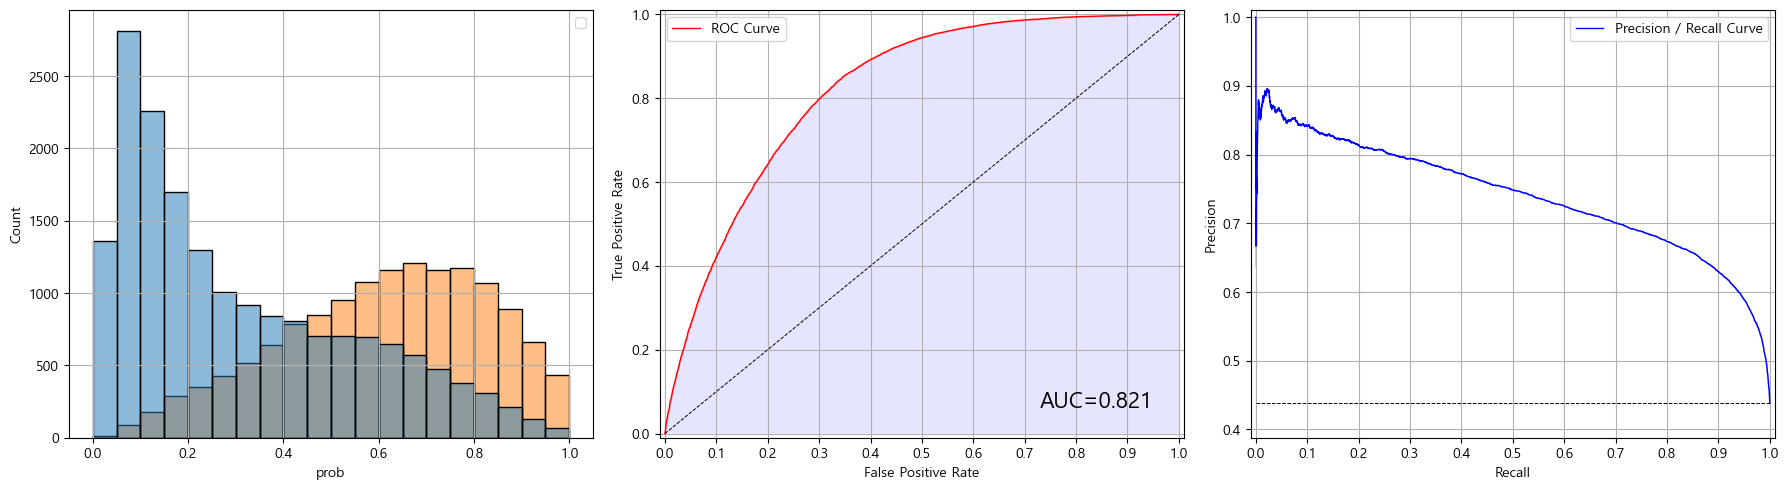


[학습곡선]


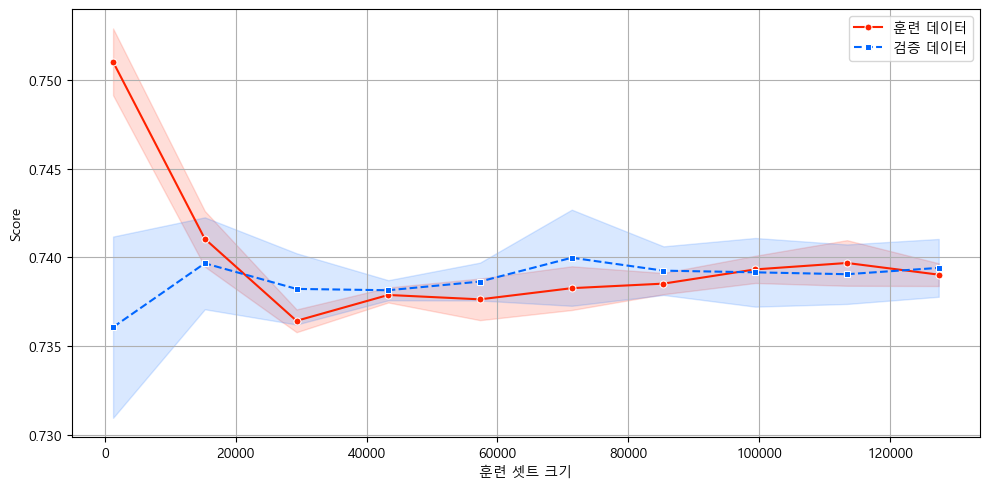

+----+------------+---------------------+--------------------+------------+----------+------------+---------+------------+
|    | 종속변수   | 독립변수            |   B(비표준화 계수) |   표준오차 |        t |   유의확률 |     VIF |   OddsRate |
|----+------------+---------------------+--------------------+------------+----------+------------+---------+------------|
|  0 | smoking    | age                 |            -0.0108 |      0.002 |  -7.0884 |          0 | 26.4717 |     0.9892 |
|  1 | smoking    | height(cm)          |             0.0034 |      0.003 |   1.2745 |      0.202 | 382.334 |     1.0034 |
|  2 | smoking    | weight(kg)          |             0.0364 |      0.003 |   12.892 |          0 | 148.398 |     1.0371 |
|  3 | smoking    | waist(cm)           |            -0.0515 |      0.003 | -15.3243 |          0 | 328.196 |     0.9498 |
|  4 | smoking    | eyesight(left)      |            -0.0893 |      0.039 |   -2.301 |      0.021 | 8.94115 |     0.9146 |
|  5 | smoking    | eyesight(right)   

LogisticRegression(C=1, max_iter=500, n_jobs=-1)

In [101]:
my_logistic_classification(x_train, y_train, x_test, y_test)

## #8. KNN 분류

[교차검증]
+----+-------------+---------------+-----+-----------+-------------------+
|    | algorithm   |   n_neighbors |   p | weights   |   mean_test_score |
|----+-------------+---------------+-----+-----------+-------------------|
| 21 | kd_tree     |             7 |   1 | distance  |          0.733643 |
|  9 | ball_tree   |             7 |   1 | distance  |          0.733627 |
| 20 | kd_tree     |             7 |   1 | uniform   |           0.73358 |
|  8 | ball_tree   |             7 |   1 | uniform   |          0.733572 |
| 33 | brute       |             7 |   1 | distance  |          0.733572 |
| 32 | brute       |             7 |   1 | uniform   |          0.733509 |
| 10 | ball_tree   |             7 |   2 | uniform   |          0.727128 |
| 34 | brute       |             7 |   2 | uniform   |          0.727128 |
| 22 | kd_tree     |             7 |   2 | uniform   |          0.727128 |
| 11 | ball_tree   |             7 |   2 | distance  |          0.727057 |
| 23 | kd_tree    

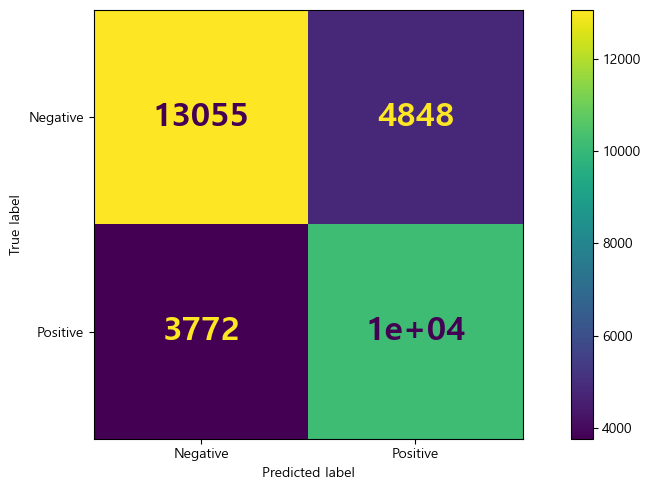


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


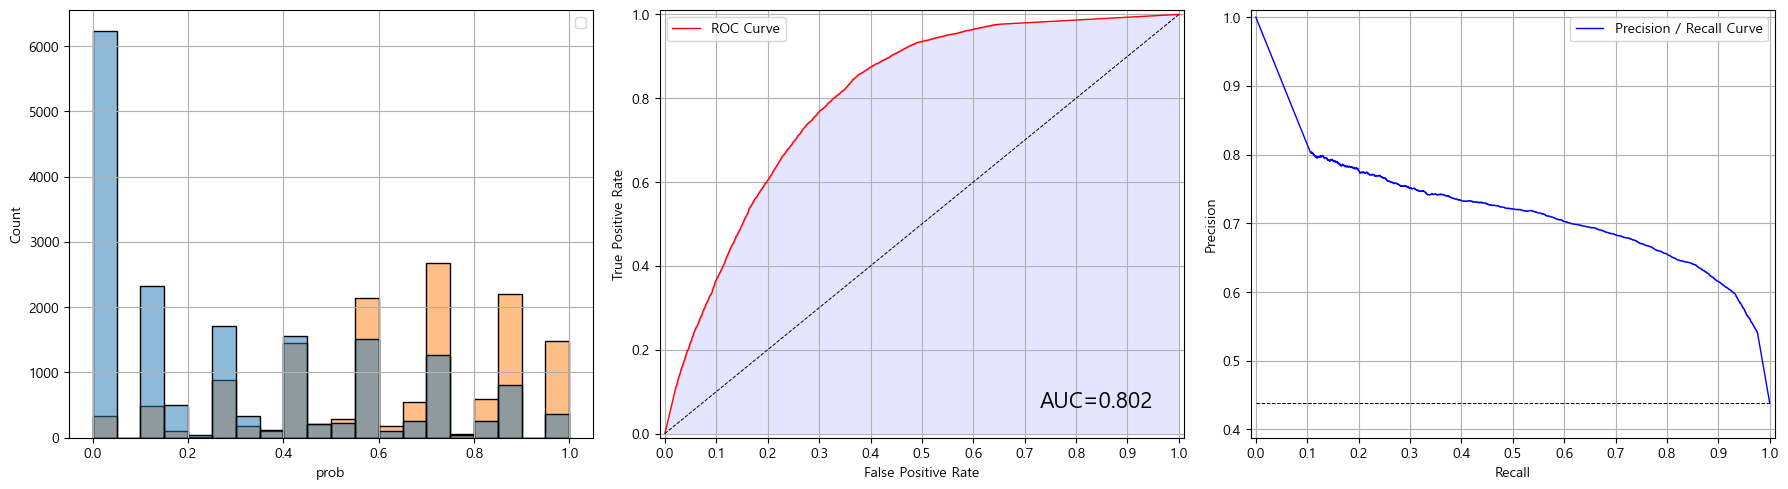


[학습곡선]


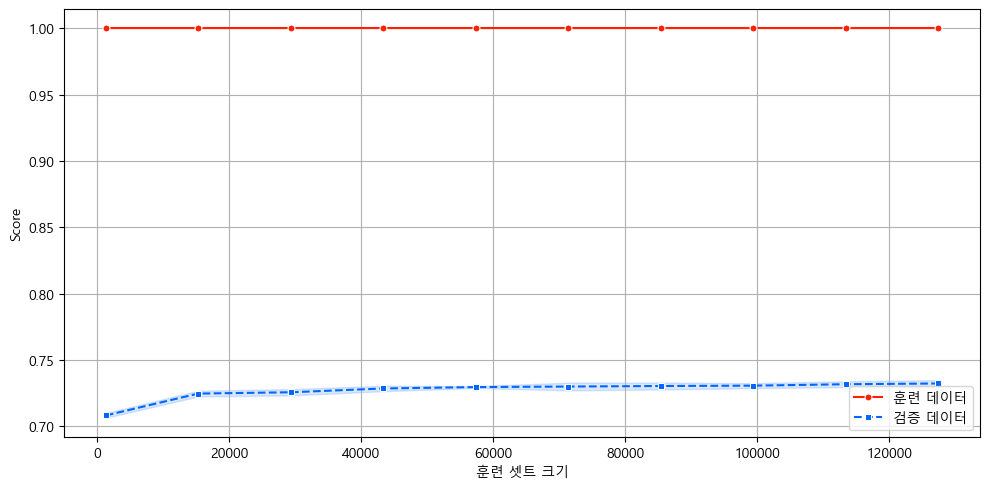

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=7, p=1,
                     weights='distance')

In [102]:
my_knn_classification(x_train, y_train, x_test, y_test)

> 로지스틱분석과 KNN분석 결과는 다음과 같다.
>| 구분 | 로지스틱회귀 | KNN |
>|---|---|---|
>| 정확도 | 0.737 | 0.729 |
>| 정밀도 | 0.699 | 0.677 |
>| 재현율 | 0.702 | 0.729 |
>| 특이도 | 0.765 | 0.729 |
>| AUC | 0.820 | 0.801 |

> 전반적으로 로지스틱회귀가 KNN보다 더 적합하게 보인다. 하지만 학습곡선을 보면 KNN은 과대적합이라고 볼 수 있다. 다중공선성이 있는 변수를 제거하고 파생변수를 추가하는 등의 전처리가 필요해 보인다. 